<a href="https://colab.research.google.com/github/Satyam-ptl/Deforestation-analysis/blob/main/Deforestation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ankanhore545/deforestation-cover-india-2000-2020")

print("Path to dataset files:", path)
#Downloaded Data from kaggle

100%|██████████| 1.11M/1.11M [00:00<00:00, 54.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ankanhore545/deforestation-cover-india-2000-2020/versions/3


In [2]:
!ls "{path}"

'Country carbon data.xlsx'	  'Subnational 1 tree cover loss.xlsx'
'Country tree cover loss.xlsx'	  'Subnational 2 carbon data.xlsx'
'Subnational 1 carbon data.xlsx'  'Subnational 2 tree cover loss.xlsx'


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# Replace the filename with the actual one you found
df = pd.read_excel(f"{path}/Country tree cover loss.xlsx")
# Preview the data
df


,country,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2012_ha,tc_loss_ha_2001,tc_loss_ha_2002,tc_loss_ha_2003,tc_loss_ha_2004,...,tc_loss_ha_2011,tc_loss_ha_2012,tc_loss_ha_2013,tc_loss_ha_2014,tc_loss_ha_2015,tc_loss_ha_2016,tc_loss_ha_2017,tc_loss_ha_2018,tc_loss_ha_2019,tc_loss_ha_2020
0,India,0,315279651,315279651,315279651,255071,66206,57258,52001,81335,...,103916,115841,115800,185371,150249,232572,251164,191780,174537,195954
1,India,10,315279651,49091050,43360360,255071,63970,54643,49342,76823,...,93751,100847,88796,150939,124481,188819,204475,146207,132931,150519
2,India,15,315279651,44955777,38986583,255071,63439,54051,48793,75809,...,91705,98802,86243,147040,121704,184326,199157,141378,128808,146023
3,India,20,315279651,43702784,38376592,255071,63176,53731,48508,75336,...,90850,97770,84845,145084,120365,182055,196811,139154,126954,143989
4,India,25,315279651,41737014,37060716,255071,62610,53233,47978,74496,...,89316,96487,83532,143188,119091,179916,194618,136966,125182,142026
5,India,30,315279651,38830351,34435273,255071,62361,53005,47751,74129,...,88460,95069,80866,139138,116308,175362,189421,132233,121154,137716
6,India,50,315279651,30465293,23802597,255071,58273,48500,43330,66983,...,76084,83478,70317,121980,104529,156387,169313,114924,106397,121378
7,India,75,315279651,16790629,13571646,255071,45401,35966,31513,49134,...,48363,56895,39930,66368,62097,92599,98487,61340,57756,66505


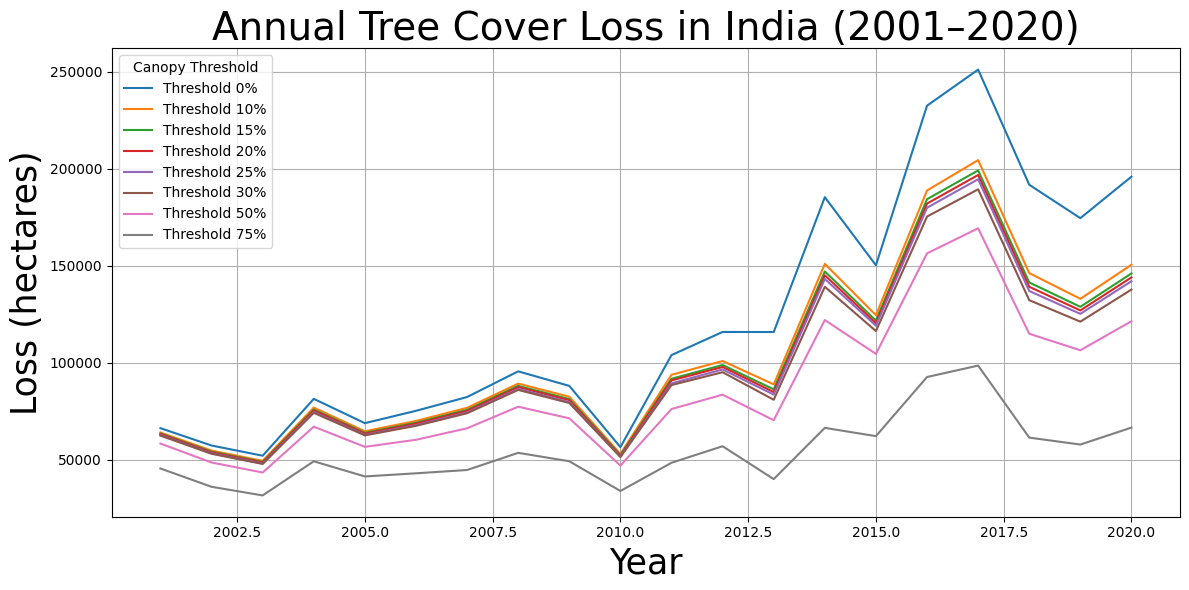

In [4]:
import matplotlib.pyplot as plt

# Years from 2001 to 2020
years = list(range(2001, 2021))
loss_cols = [f"tc_loss_ha_{year}" for year in years]

# Plot tree loss for each threshold
plt.figure(figsize=(12, 6))

for index, row in df.iterrows():
    plt.plot(years, row[loss_cols], label=f"Threshold {row['threshold']}%")

plt.title("Annual Tree Cover Loss in India (2001–2020)",size = "28")
plt.xlabel("Year",size = 25)
plt.ylabel("Loss (hectares)",size = 25)
plt.legend(title="Canopy Threshold")
plt.grid(True)
plt.tight_layout()
plt.show()


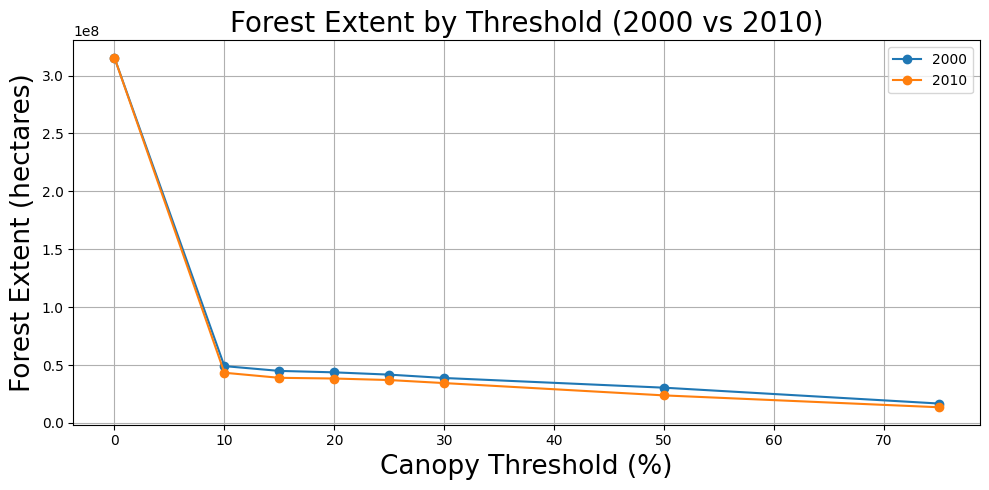

In [5]:
plt.figure(figsize=(10, 5))

plt.plot(df['threshold'], df['extent_2000_ha'], marker='o', label='2000')
plt.plot(df['threshold'], df['extent_2010_ha'], marker='o', label='2010')

plt.title("Forest Extent by Threshold (2000 vs 2010)",size = 20)
plt.xlabel("Canopy Threshold (%)",size=19)
plt.ylabel("Forest Extent (hectares)",size=19)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


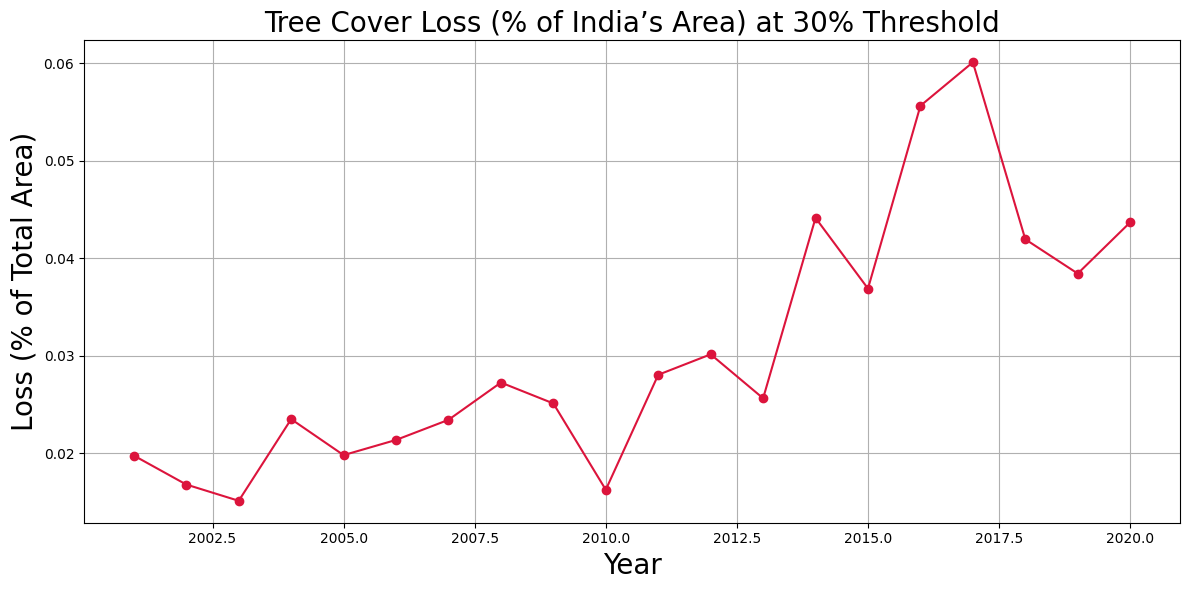

In [6]:
# Filter for threshold 30%
row_30 = df[df['threshold'] == 30].iloc[0]
loss_percent = [(row_30[f"tc_loss_ha_{year}"] / row_30["area_ha"]) * 100 for year in years]

plt.figure(figsize=(12, 6))
plt.plot(years, loss_percent, marker='o', color='crimson')

plt.title("Tree Cover Loss (% of India’s Area) at 30% Threshold",size=20)
plt.xlabel("Year",size=20)
plt.ylabel("Loss (% of Total Area)",size = 20)
plt.grid(True)
plt.tight_layout()
plt.show()


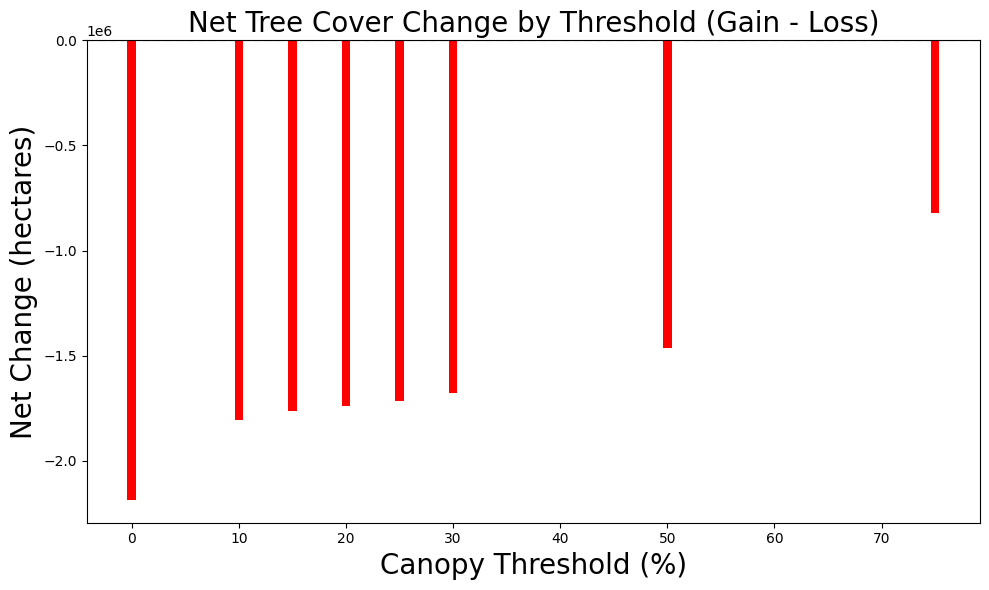

In [7]:
# Total loss over 20 years
df["total_loss_ha"] = df[loss_cols].sum(axis=1)

# Net change
df["net_change_ha"] = df["gain_2000-2012_ha"] - df["total_loss_ha"]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(df["threshold"], df["net_change_ha"], color=["green" if x >= 0 else "red" for x in df["net_change_ha"]])

plt.axhline(0, color='black', linestyle='--')
plt.title("Net Tree Cover Change by Threshold (Gain - Loss)",size=20)
plt.xlabel("Canopy Threshold (%)",size=20)
plt.ylabel("Net Change (hectares)",size = 20)
plt.tight_layout()
plt.show()
